# Import data dan Library

In [131]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.decomposition import PCA

# plotting modules
import matplotlib.pyplot as plt
import seaborn as sns

In [132]:
#Memuat dataframe dangan header kolom
from google.colab import drive
drive.mount('/content/drive')
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/seeds.csv')

#Lihat 5 baris pertama dataframe
dataset.head(210)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Area,Perimeter,Compactness,Length of Kernel,Width of Kernel,Asymmetry Coefficient,Length of Kernel Groove,Class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [133]:
#cek jumlah baris dan kolom dari dataframe
print(dataset.shape)

(210, 8)


In [134]:
#Lihat statistik dataframe
dataset.describe()

,Area,Perimeter,Compactness,Length of Kernel,Width of Kernel,Asymmetry Coefficient,Length of Kernel Groove,Class
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


In [135]:
#Memilih fitur yang akan di klastering
X = dataset.iloc[:, [0, 1, 2, 3, 4, 5, 6]].values

# Hirarki Klaster tanpa pre-procesing

**Penentuan jumlah klaster yang optimal**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

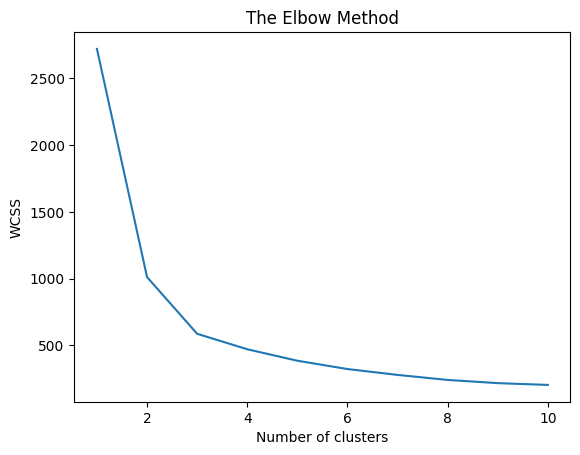

In [136]:
# Using the elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

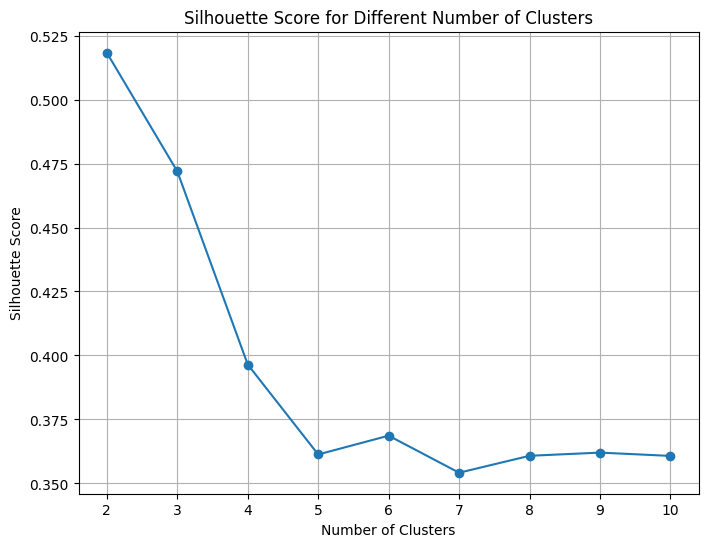

Silhouette Score for 2 clusters: 0.5182873410849098
Silhouette Score for 3 clusters: 0.4719337319126887
Silhouette Score for 4 clusters: 0.39646457495739773
Silhouette Score for 5 clusters: 0.3613234083219364
Silhouette Score for 6 clusters: 0.36866578093739255
Silhouette Score for 7 clusters: 0.35418936587734456
Silhouette Score for 8 clusters: 0.3608040092896943
Silhouette Score for 9 clusters: 0.36204857287487746
Silhouette Score for 10 clusters: 0.3607561779726557


In [137]:
# Membuat list untuk menyimpan skor Silhouette
silhouette_scores = []

# Menghitung skor Silhouette untuk berbagai jumlah kluster (2 hingga kmax)
kmax = 10

for k in range(2, kmax + 1):
    kmeans = KMeans(n_clusters=k).fit(X)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(X, labels, metric='euclidean')
    silhouette_scores.append(silhouette_avg)

# Visualisasi skor Silhouette
plt.figure(figsize=(8, 6))
plt.plot(range(2, kmax + 1), silhouette_scores, marker='o', linestyle='-')
plt.title('Silhouette Score for Different Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

# Tampilkan skor Silhouette untuk setiap jumlah kluster
for k, score in enumerate(silhouette_scores, start=2):
    print(f"Silhouette Score for {k} clusters: {score}")

**Single Linkage (berdasarkan jarak terpendek)**

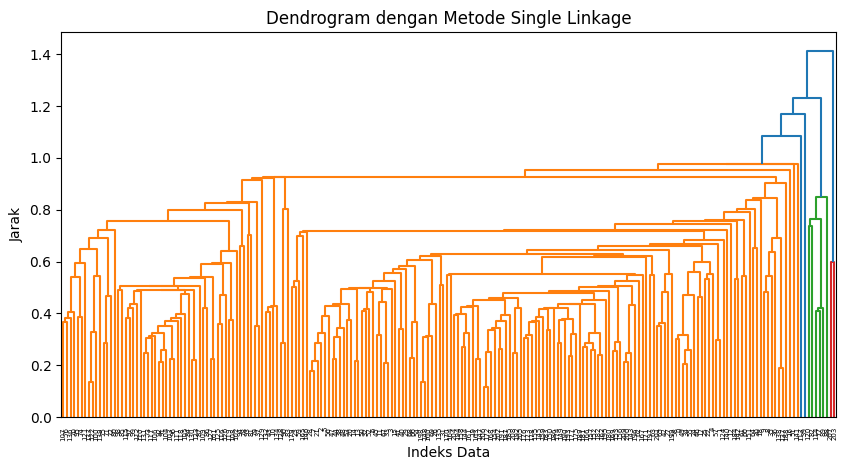

Hasil Klastering dengan Single Linkage:
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1 2 2]


In [138]:
# Hitung matriks jarak antar data
from scipy.spatial.distance import pdist
distance_matrix = pdist(X)

# Lakukan analisis klastering dengan metode Single Linkage
linkage_matrix = linkage(distance_matrix, method='single')

# Buat dendrogram
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix, orientation='top', distance_sort='descending')
plt.title('Dendrogram dengan Metode Single Linkage')
plt.xlabel('Indeks Data')
plt.ylabel('Jarak')
plt.show()

# Tentukan jumlah klaster yang ingin Anda hasilkan
num_clusters = 2

# Lakukan pemotongan dendrogram untuk mendapatkan hasil klastering
clusters = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

# Tampilkan hasil klastering
print("Hasil Klastering dengan Single Linkage:")
print(clusters)

In [139]:
# Hitung Silhouette Score untuk hasil klastering
silhouette_avg = silhouette_score(X, clusters)

# Tampilkan nilai Silhouette Score
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.2192738798063939


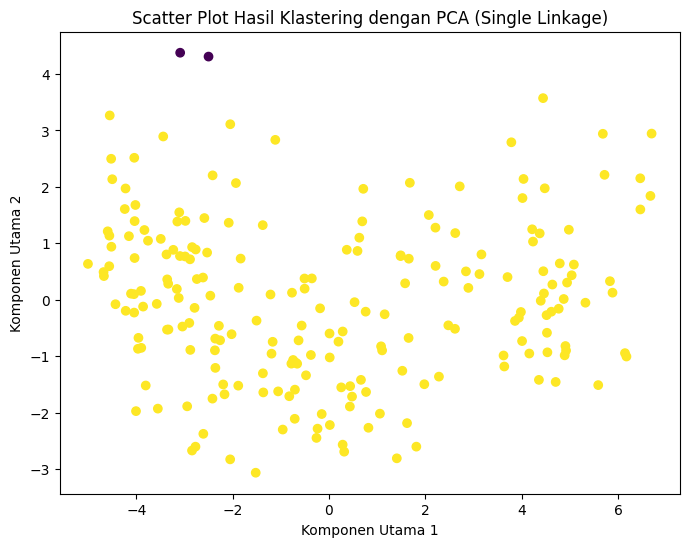

In [140]:
# Lakukan analisis PCA untuk mengurangi dimensi menjadi 2 komponen utama
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Buat scatter plot dari hasil klastering
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.title('Scatter Plot Hasil Klastering dengan PCA (Single Linkage)')
plt.xlabel('Komponen Utama 1')
plt.ylabel('Komponen Utama 2')
plt.show()

**Complete Linkage (berdasarkan jarak terjauh)**

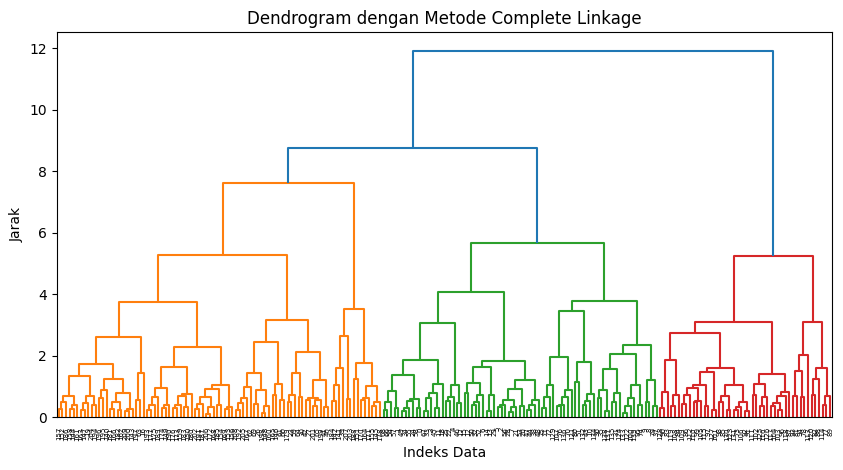

Hasil Klastering dengan Complete Linkage:
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1
 2 2 2 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1
 1 1 1 1 1 1 1 1 1 1 2 2 1 2 1 1 1 1 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [141]:
# Lakukan analisis klastering dengan metode Complete Linkage
linkage_matrix = linkage(distance_matrix, method='complete')

# Buat dendrogram
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix, orientation='top', distance_sort='descending')
plt.title('Dendrogram dengan Metode Complete Linkage')
plt.xlabel('Indeks Data')
plt.ylabel('Jarak')
plt.show()

# Tentukan jumlah klaster yang ingin Anda hasilkan (contoh: 3)
num_clusters = 2

# Lakukan pemotongan dendrogram untuk mendapatkan hasil klastering
clusters = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

# Tampilkan hasil klastering
print("Hasil Klastering dengan Complete Linkage:")
print(clusters)

In [142]:
# Hitung Silhouette Score untuk hasil klastering
silhouette_avg = silhouette_score(X, clusters)

# Tampilkan nilai Silhouette Score
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.4801599396217445


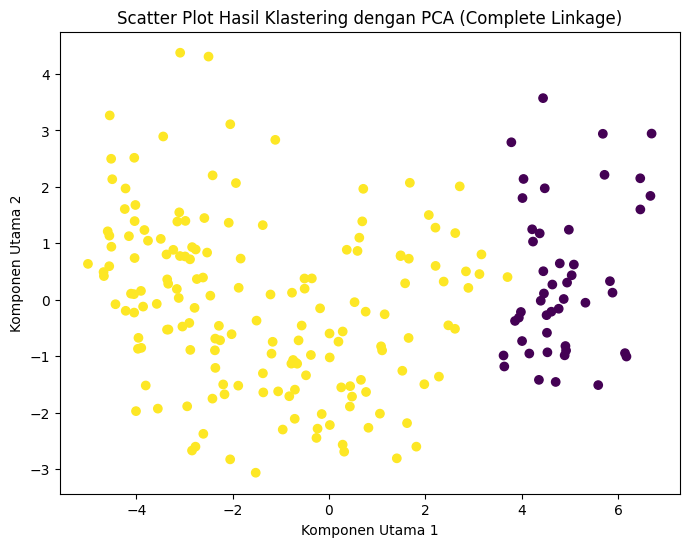

In [143]:
# Lakukan analisis PCA untuk mengurangi dimensi menjadi 2 komponen utama
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Buat scatter plot dari hasil klastering
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.title('Scatter Plot Hasil Klastering dengan PCA (Complete Linkage)')
plt.xlabel('Komponen Utama 1')
plt.ylabel('Komponen Utama 2')
plt.show()

**Average Linkage (berdasarkan rata-rata jarak)**

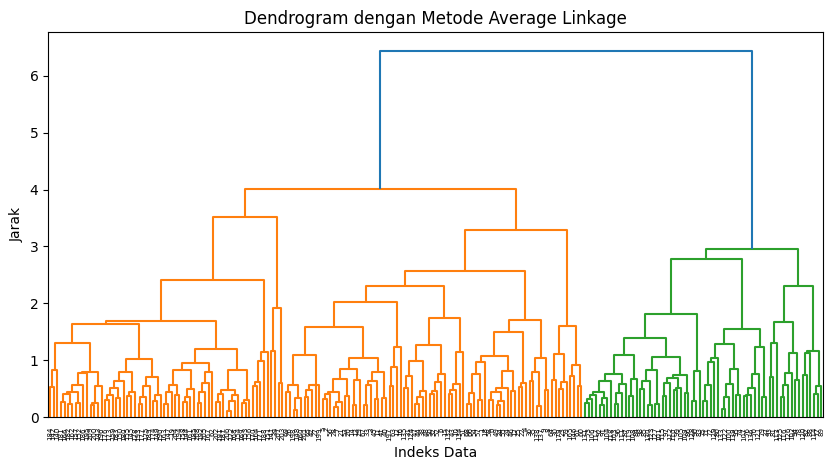

Hasil Klastering dengan Average Linkage:
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 2 2 1 2 2 1 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [144]:
# Lakukan analisis klastering dengan metode Average Linkage
linkage_matrix = linkage(distance_matrix, method='average')

# Buat dendrogram
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix, orientation='top', distance_sort='descending')
plt.title('Dendrogram dengan Metode Average Linkage')
plt.xlabel('Indeks Data')
plt.ylabel('Jarak')
plt.show()

# Tentukan jumlah klaster yang ingin Anda hasilkan (contoh: 3)
num_clusters = 2

# Lakukan pemotongan dendrogram untuk mendapatkan hasil klastering
clusters = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

# Tampilkan hasil klastering
print("Hasil Klastering dengan Average Linkage:")
print(clusters)

In [145]:
# Hitung Silhouette Score untuk hasil klastering
silhouette_avg = silhouette_score(X, clusters)

# Tampilkan nilai Silhouette Score
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.524847334721903


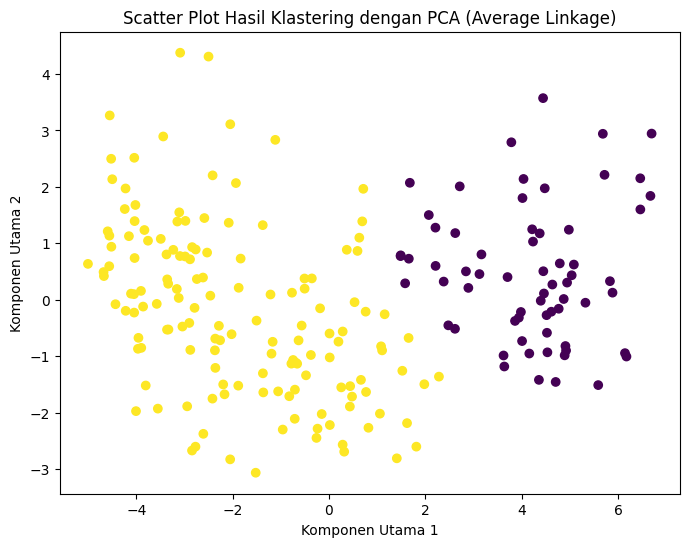

In [146]:
# Lakukan analisis PCA untuk mengurangi dimensi menjadi 2 komponen utama
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Buat scatter plot dari hasil klastering
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.title('Scatter Plot Hasil Klastering dengan PCA (Average Linkage)')
plt.xlabel('Komponen Utama 1')
plt.ylabel('Komponen Utama 2')
plt.show()

**Centroid Linkage (berdasarkan dua cluster pada masing-masing variabel)**

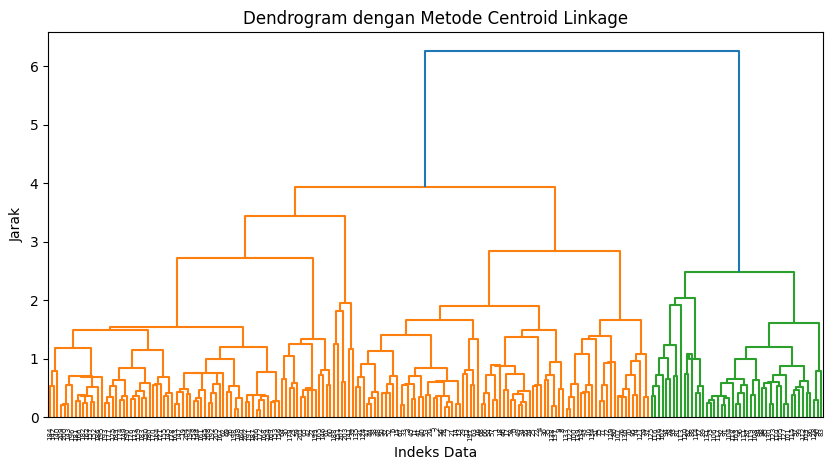

Hasil Klastering dengan Centroid Linkage:
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1
 2 2 2 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1
 1 1 1 1 1 1 1 1 1 1 2 2 1 2 1 1 1 1 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [147]:
# Lakukan analisis klastering dengan metode Centroid Linkage
linkage_matrix = linkage(distance_matrix, method='centroid')

# Buat dendrogram
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix, orientation='top', distance_sort='descending')
plt.title('Dendrogram dengan Metode Centroid Linkage')
plt.xlabel('Indeks Data')
plt.ylabel('Jarak')
plt.show()

# Tentukan jumlah klaster yang ingin Anda hasilkan (contoh: 3)
num_clusters = 2

# Lakukan pemotongan dendrogram untuk mendapatkan hasil klastering
clusters = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

# Tampilkan hasil klastering
print("Hasil Klastering dengan Centroid Linkage:")
print(clusters)

In [148]:
# Hitung Silhouette Score untuk hasil klastering
silhouette_avg = silhouette_score(X, clusters)

# Tampilkan nilai Silhouette Score
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.4801599396217445


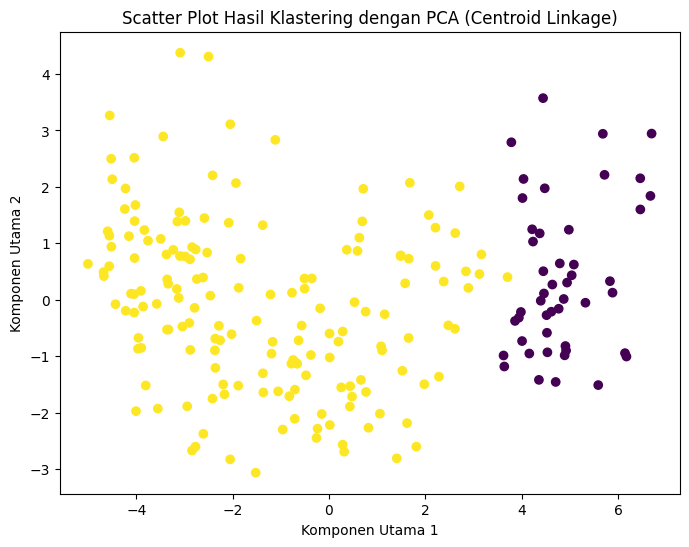

In [149]:
# Lakukan analisis PCA untuk mengurangi dimensi menjadi 2 komponen utama
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Buat scatter plot dari hasil klastering
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.title('Scatter Plot Hasil Klastering dengan PCA (Centroid Linkage)')
plt.xlabel('Komponen Utama 1')
plt.ylabel('Komponen Utama 2')
plt.show()

**Ward Method (berdasarkan jarak centroid dua cluster yang bersangkutan)**

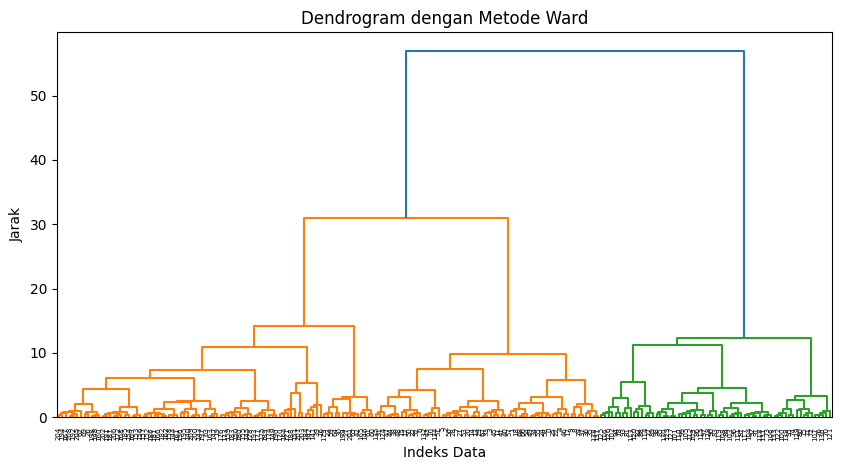

Hasil Klastering dengan Ward Method:
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1
 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 2 2 1 2 2 1 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [150]:
# Lakukan analisis klastering dengan metode Ward
linkage_matrix = linkage(distance_matrix, method='ward')

# Buat dendrogram
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix, orientation='top', distance_sort='descending')
plt.title('Dendrogram dengan Metode Ward')
plt.xlabel('Indeks Data')
plt.ylabel('Jarak')
plt.show()

# Tentukan jumlah klaster yang ingin Anda hasilkan
num_clusters = 2

# Lakukan pemotongan dendrogram untuk mendapatkan hasil klastering
clusters = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

# Tampilkan hasil klastering
print("Hasil Klastering dengan Ward Method:")
print(clusters)

In [151]:
# Hitung Silhouette Score untuk hasil klastering
silhouette_avg = silhouette_score(X, clusters)

# Tampilkan nilai Silhouette Score
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.5164895928435842


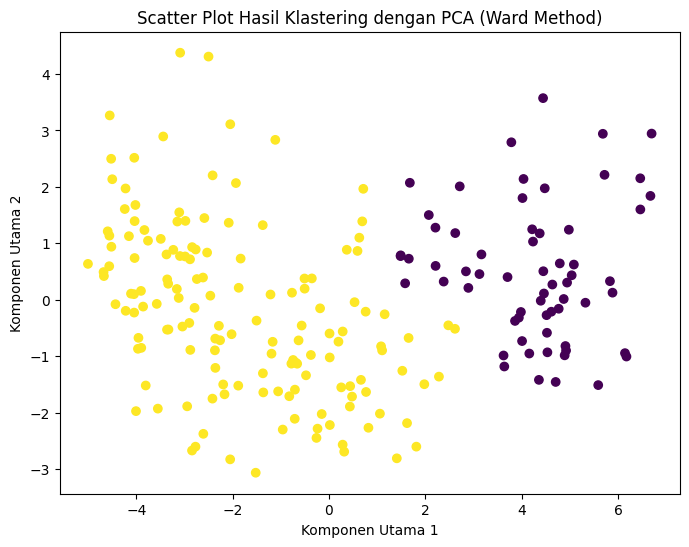

In [152]:
# Lakukan analisis PCA untuk mengurangi dimensi menjadi 2 komponen utama
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Buat scatter plot dari hasil klastering
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.title('Scatter Plot Hasil Klastering dengan PCA (Ward Method)')
plt.xlabel('Komponen Utama 1')
plt.ylabel('Komponen Utama 2')
plt.show()

# Pre-procesing

**Penanganan Data Duplikat** : Memastikan bahwa data dalam dataframe tidak ada yang terduplikat

In [153]:
import pandas as pd

# Jumlah data sebelum penanganan data duplikat
jumlah_data_sebelum = len(X)

# Penanganan data duplikat
X = pd.DataFrame(X)  # Mengubah objek X menjadi DataFrame pandas
X = X.drop_duplicates()  # Menghapus data duplikat

# Jumlah data setelah penanganan data duplikat
jumlah_data_setelah = len(X)

# Menampilkan semua data yang telah dilakukan penanganan data duplikat
print("1. Jumlah data sebelum penanganan data duplikat:", jumlah_data_sebelum)
print("2. Jumlah data setelah penanganan data duplikat:", jumlah_data_setelah)
print("3. Data setelah penanganan data duplikat:")
print(X)

1. Jumlah data sebelum penanganan data duplikat: 210
2. Jumlah data setelah penanganan data duplikat: 210
3. Data setelah penanganan data duplikat:
         0      1       2      3      4      5      6
0    15.26  14.84  0.8710  5.763  3.312  2.221  5.220
1    14.88  14.57  0.8811  5.554  3.333  1.018  4.956
2    14.29  14.09  0.9050  5.291  3.337  2.699  4.825
3    13.84  13.94  0.8955  5.324  3.379  2.259  4.805
4    16.14  14.99  0.9034  5.658  3.562  1.355  5.175
..     ...    ...     ...    ...    ...    ...    ...
205  12.19  13.20  0.8783  5.137  2.981  3.631  4.870
206  11.23  12.88  0.8511  5.140  2.795  4.325  5.003
207  13.20  13.66  0.8883  5.236  3.232  8.315  5.056
208  11.84  13.21  0.8521  5.175  2.836  3.598  5.044
209  12.30  13.34  0.8684  5.243  2.974  5.637  5.063

[210 rows x 7 columns]


**Penanganan Data Hilang (missing value)** : Mengatasi nilai-nilai yang kosong atau hilang dalam dataframe

In [154]:
#Cek missing value
missing_value_cek = X.isnull().sum()
missing_value_cek

0    0
1    0
2    0
3    0
4    0
5    0
6    0
dtype: int64

**Standarisasi** : Mengubah skala atau rentang atribut dalam dataset
agar memiliki skala yang seragam

In [155]:
#Standarisasi feature
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
standardized = scaler.fit_transform(X)

stardardized_data = pd.DataFrame(standardized)
stardardized_data.head()

,0,1,2,3,4,5,6
0,0.142098,0.215462,0.000061,0.304218,0.141702,-0.986152,-0.383577
1,0.011188,0.008224,0.428515,-0.168625,0.197432,-1.788166,-0.922013
2,-0.192067,-0.360201,1.442383,-0.763637,0.208048,-0.667479,-1.189192
3,-0.347091,-0.475333,1.039381,-0.688978,0.319508,-0.960818,-1.229983
4,0.445257,0.330595,1.374509,0.066666,0.805159,-1.563495,-0.475356


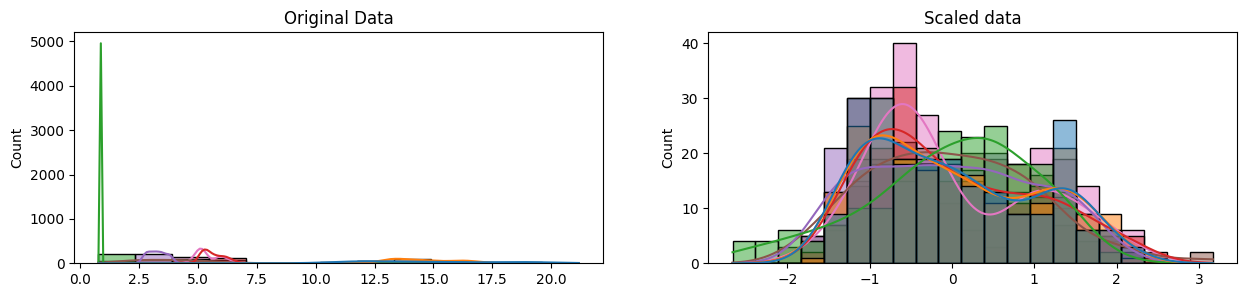

In [156]:
# plot both together to compare
fig, ax = plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(X, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(stardardized_data, ax=ax[1], kde=True, legend=False)
ax[1].set_title("Scaled data")
plt.show()

# Hirarki Klaster setelah pre-procesing

**Penentuan jumlah klaster yang optimal**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

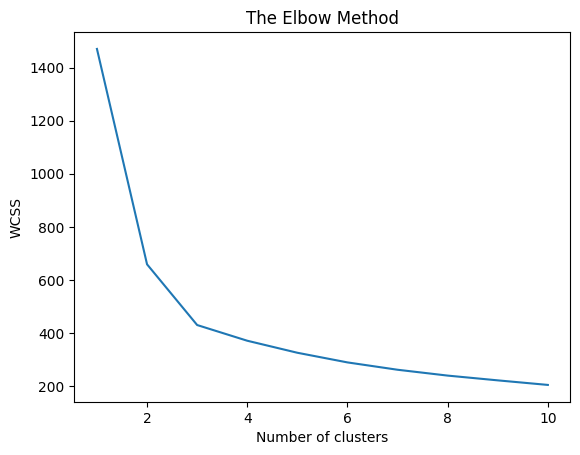

In [157]:
# Using the elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(stardardized_data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

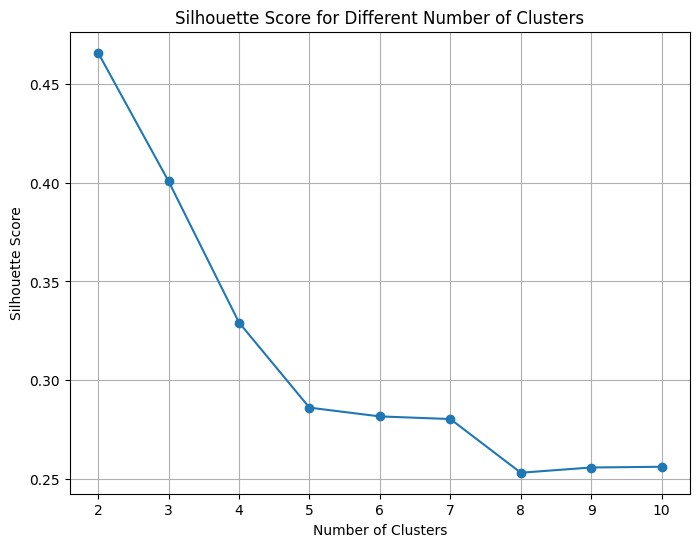

Silhouette Score for 2 clusters: 0.46577247686580914
Silhouette Score for 3 clusters: 0.40072705527512986
Silhouette Score for 4 clusters: 0.3291966792017614
Silhouette Score for 5 clusters: 0.28610899402354895
Silhouette Score for 6 clusters: 0.28166979191658637
Silhouette Score for 7 clusters: 0.28034184269641604
Silhouette Score for 8 clusters: 0.2531681513078776
Silhouette Score for 9 clusters: 0.25581034583882567
Silhouette Score for 10 clusters: 0.2561802619064387


In [158]:
# Membuat list untuk menyimpan skor Silhouette
silhouette_scores = []

# Menghitung skor Silhouette untuk berbagai jumlah kluster (2 hingga kmax)
kmax = 10

for k in range(2, kmax + 1):
    kmeans = KMeans(n_clusters=k).fit(stardardized_data)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(stardardized_data, labels, metric='euclidean')
    silhouette_scores.append(silhouette_avg)

# Visualisasi skor Silhouette
plt.figure(figsize=(8, 6))
plt.plot(range(2, kmax + 1), silhouette_scores, marker='o', linestyle='-')
plt.title('Silhouette Score for Different Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

# Tampilkan skor Silhouette untuk setiap jumlah kluster
for k, score in enumerate(silhouette_scores, start=2):
    print(f"Silhouette Score for {k} clusters: {score}")

**Single Linkage (berdasarkan jarak terpendek)**

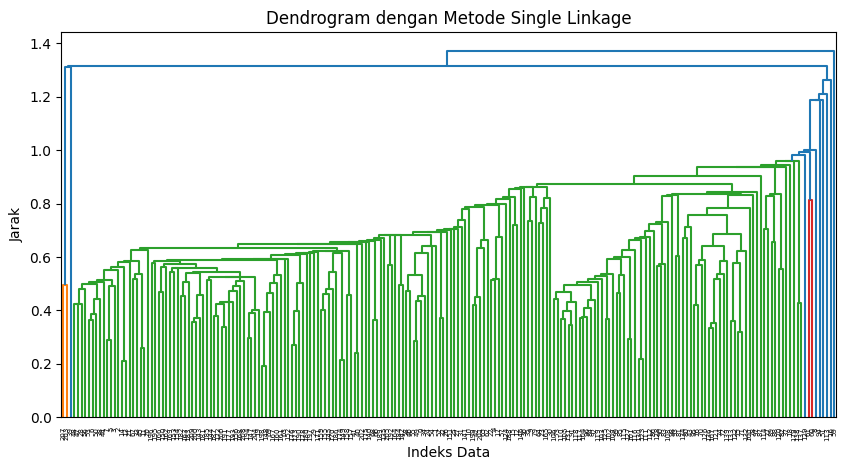

Hasil Klastering dengan Single Linkage:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [159]:
# Hitung matriks jarak antar data
from scipy.spatial.distance import pdist
distance_matrix = pdist(stardardized_data)

# Lakukan analisis klastering dengan metode Single Linkage
linkage_matrix = linkage(distance_matrix, method='single')

# Buat dendrogram
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix, orientation='top', distance_sort='descending')
plt.title('Dendrogram dengan Metode Single Linkage')
plt.xlabel('Indeks Data')
plt.ylabel('Jarak')
plt.show()

# Tentukan jumlah klaster yang ingin Anda hasilkan
num_clusters = 2

# Lakukan pemotongan dendrogram untuk mendapatkan hasil klastering
clusters = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

# Tampilkan hasil klastering
print("Hasil Klastering dengan Single Linkage:")
print(clusters)

In [160]:
# Hitung Silhouette Score untuk hasil klastering
silhouette_avg = silhouette_score(stardardized_data, clusters)

# Tampilkan nilai Silhouette Score
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.05623016590763621


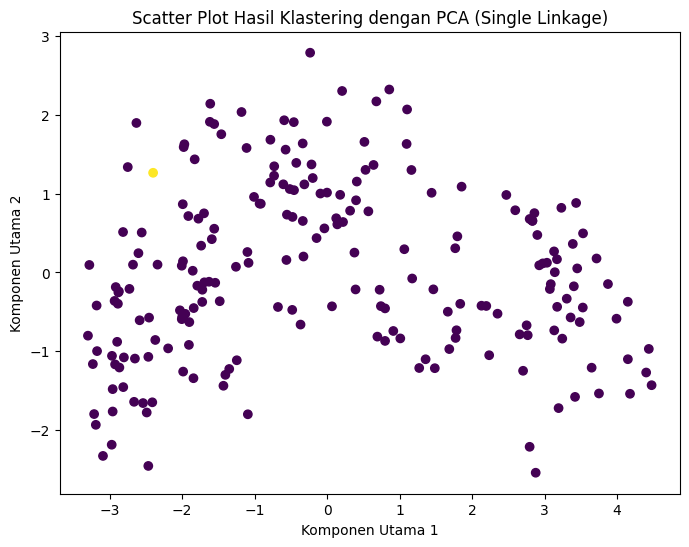

In [161]:
# Lakukan analisis PCA untuk mengurangi dimensi menjadi 2 komponen utama
pca = PCA(n_components=2)
X_pca = pca.fit_transform(stardardized_data)

# Buat scatter plot dari hasil klastering
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.title('Scatter Plot Hasil Klastering dengan PCA (Single Linkage)')
plt.xlabel('Komponen Utama 1')
plt.ylabel('Komponen Utama 2')
plt.show()

**Complete Linkage (berdasarkan jarak terjauh)**

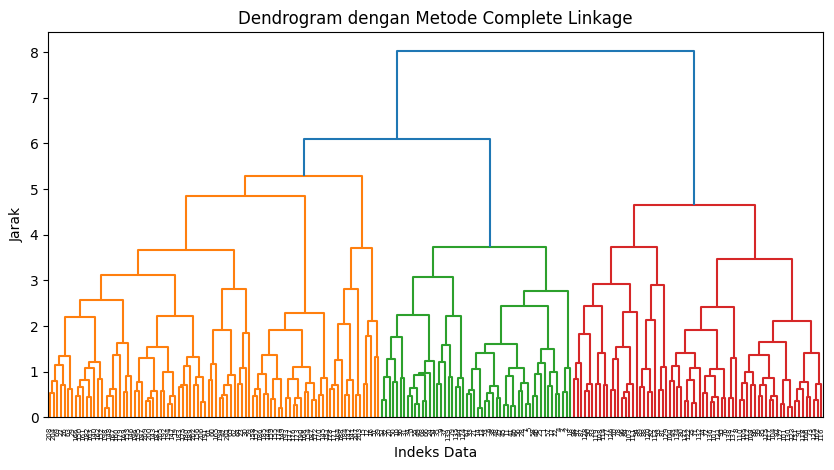

Hasil Klastering dengan Complete Linkage:
[2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1
 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [162]:
# Lakukan analisis klastering dengan metode Complete Linkage
linkage_matrix = linkage(distance_matrix, method='complete')

# Buat dendrogram
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix, orientation='top', distance_sort='descending')
plt.title('Dendrogram dengan Metode Complete Linkage')
plt.xlabel('Indeks Data')
plt.ylabel('Jarak')
plt.show()

# Tentukan jumlah klaster yang ingin Anda hasilkan (contoh: 3)
num_clusters = 2

# Lakukan pemotongan dendrogram untuk mendapatkan hasil klastering
clusters = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

# Tampilkan hasil klastering
print("Hasil Klastering dengan Complete Linkage:")
print(clusters)

In [163]:
# Hitung Silhouette Score untuk hasil klastering
silhouette_avg = silhouette_score(stardardized_data, clusters)

# Tampilkan nilai Silhouette Score
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.45199482184592565


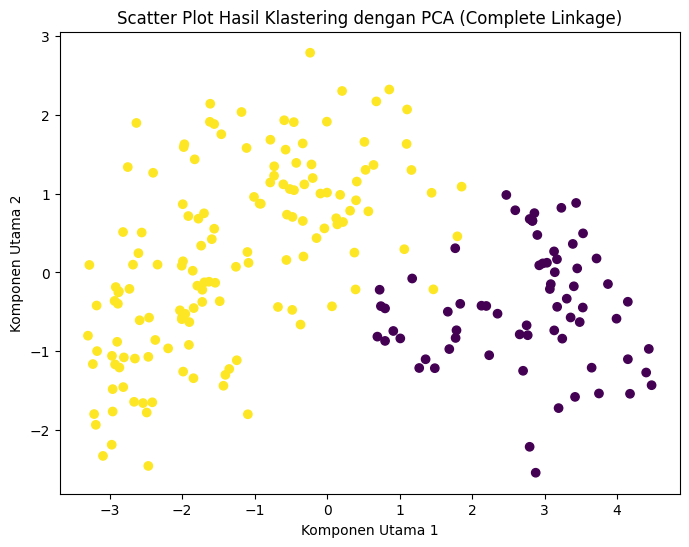

In [164]:
# Lakukan analisis PCA untuk mengurangi dimensi menjadi 2 komponen utama
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(stardardized_data)

# Buat scatter plot dari hasil klastering
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.title('Scatter Plot Hasil Klastering dengan PCA (Complete Linkage)')
plt.xlabel('Komponen Utama 1')
plt.ylabel('Komponen Utama 2')
plt.show()

**Average Linkage (berdasarkan rata-rata jarak)**

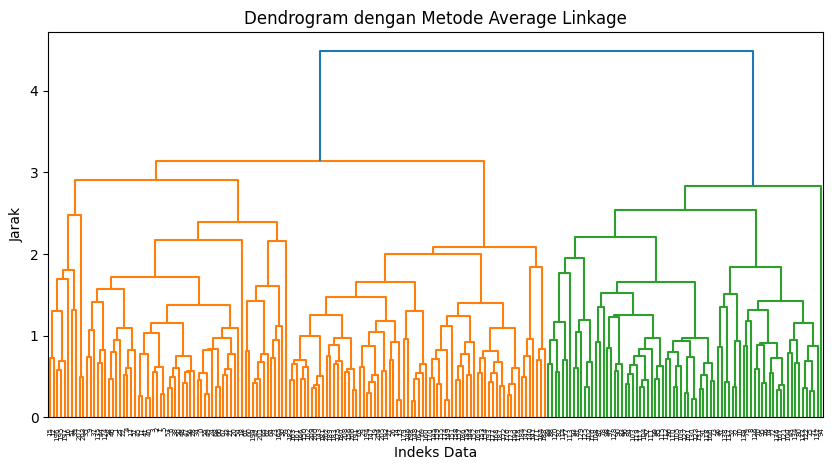

Hasil Klastering dengan Average Linkage:
[2 2 2 2 2 2 2 2 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2 1
 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [165]:
# Lakukan analisis klastering dengan metode Average Linkage
linkage_matrix = linkage(distance_matrix, method='average')

# Buat dendrogram
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix, orientation='top', distance_sort='descending')
plt.title('Dendrogram dengan Metode Average Linkage')
plt.xlabel('Indeks Data')
plt.ylabel('Jarak')
plt.show()

# Tentukan jumlah klaster yang ingin Anda hasilkan (contoh: 3)
num_clusters = 2

# Lakukan pemotongan dendrogram untuk mendapatkan hasil klastering
clusters = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

# Tampilkan hasil klastering
print("Hasil Klastering dengan Average Linkage:")
print(clusters)

In [166]:
# Hitung Silhouette Score untuk hasil klastering
silhouette_avg = silhouette_score(stardardized_data, clusters)

# Tampilkan nilai Silhouette Score
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.44133857329317233


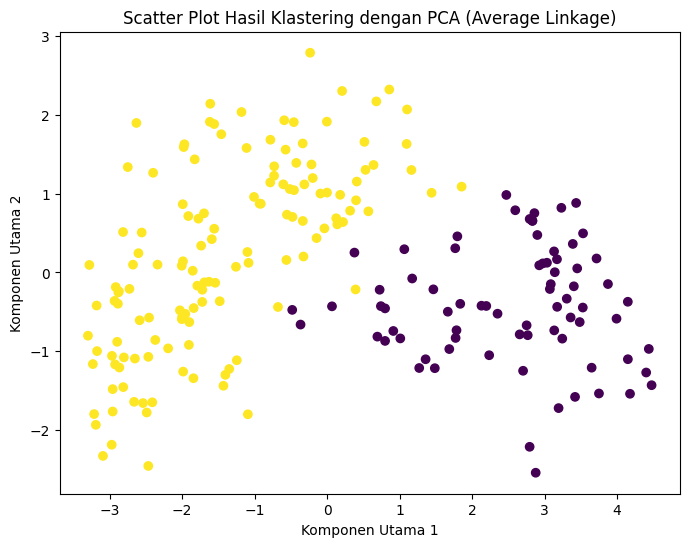

In [167]:
# Lakukan analisis PCA untuk mengurangi dimensi menjadi 2 komponen utama
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(stardardized_data)

# Buat scatter plot dari hasil klastering
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.title('Scatter Plot Hasil Klastering dengan PCA (Average Linkage)')
plt.xlabel('Komponen Utama 1')
plt.ylabel('Komponen Utama 2')
plt.show()

**Centroid Linkage (berdasarkan dua cluster pada masing-masing variabel)**

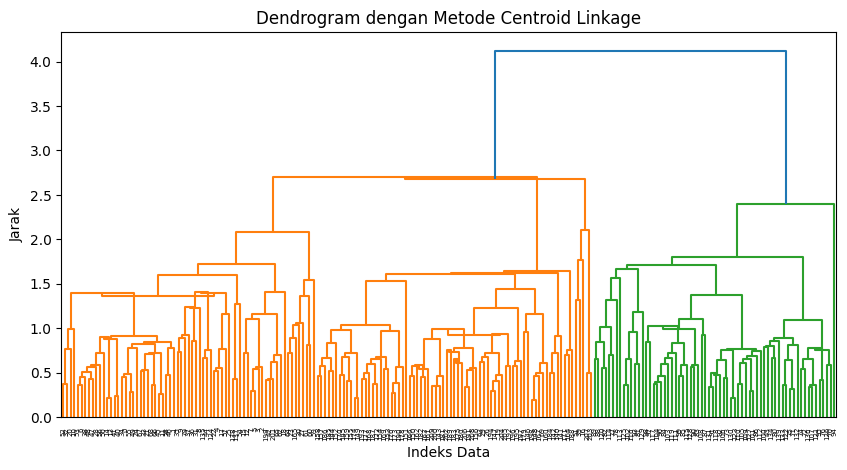

Hasil Klastering dengan Centroid Linkage:
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1
 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2 1 2 2 1 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [168]:
# Lakukan analisis klastering dengan metode Centroid Linkage
linkage_matrix = linkage(distance_matrix, method='centroid')

# Buat dendrogram
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix, orientation='top', distance_sort='descending')
plt.title('Dendrogram dengan Metode Centroid Linkage')
plt.xlabel('Indeks Data')
plt.ylabel('Jarak')
plt.show()

# Tentukan jumlah klaster yang ingin Anda hasilkan (contoh: 3)
num_clusters = 2

# Lakukan pemotongan dendrogram untuk mendapatkan hasil klastering
clusters = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

# Tampilkan hasil klastering
print("Hasil Klastering dengan Centroid Linkage:")
print(clusters)

In [169]:
# Hitung Silhouette Score untuk hasil klastering
silhouette_avg = silhouette_score(stardardized_data, clusters)

# Tampilkan nilai Silhouette Score
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.45285812052378294


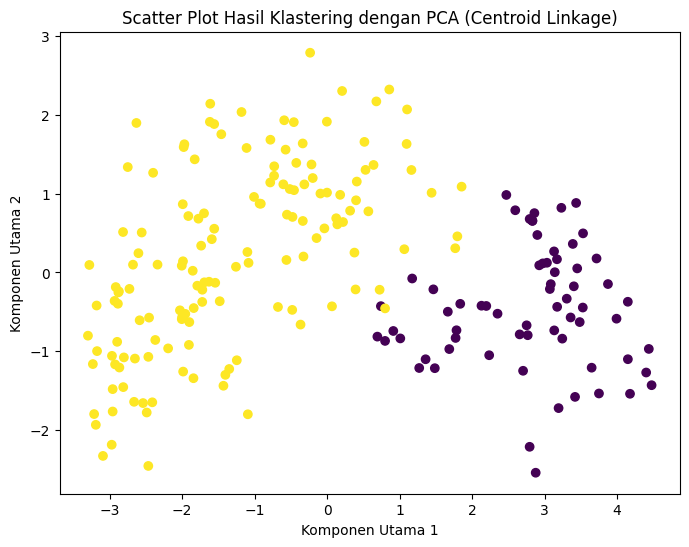

In [170]:
# Lakukan analisis PCA untuk mengurangi dimensi menjadi 2 komponen utama
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(stardardized_data)

# Buat scatter plot dari hasil klastering
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.title('Scatter Plot Hasil Klastering dengan PCA (Centroid Linkage)')
plt.xlabel('Komponen Utama 1')
plt.ylabel('Komponen Utama 2')
plt.show()

**Ward Method (berdasarkan jarak centroid dua cluster yang bersangkutan)**

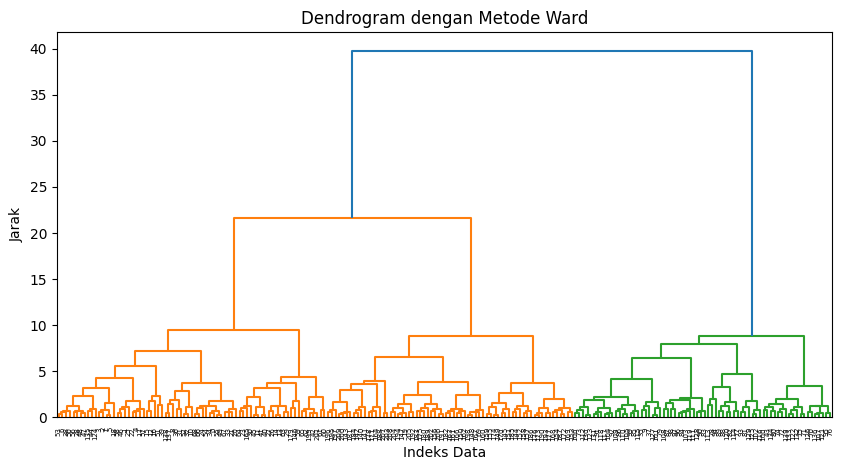

Hasil Klastering dengan Ward Method:
[2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2
 1 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2 1 2 2 1 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [171]:
# Lakukan analisis klastering dengan metode Ward
linkage_matrix = linkage(distance_matrix, method='ward')

# Buat dendrogram
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix, orientation='top', distance_sort='descending')
plt.title('Dendrogram dengan Metode Ward')
plt.xlabel('Indeks Data')
plt.ylabel('Jarak')
plt.show()

# Tentukan jumlah klaster yang ingin Anda hasilkan
num_clusters = 2

# Lakukan pemotongan dendrogram untuk mendapatkan hasil klastering
clusters = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

# Tampilkan hasil klastering
print("Hasil Klastering dengan Ward Method:")
print(clusters)

In [172]:
# Hitung Silhouette Score untuk hasil klastering
silhouette_avg = silhouette_score(stardardized_data, clusters)

# Tampilkan nilai Silhouette Score
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.4612971903388491


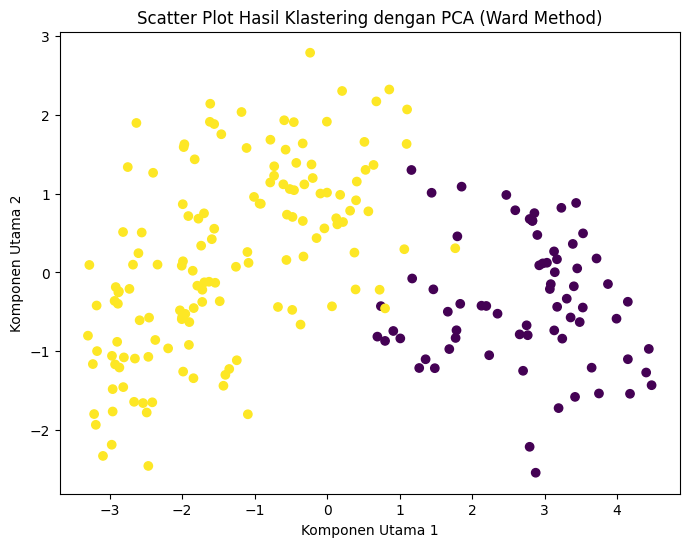

In [173]:
# Lakukan analisis PCA untuk mengurangi dimensi menjadi 2 komponen utama
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(stardardized_data)

# Buat scatter plot dari hasil klastering
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.title('Scatter Plot Hasil Klastering dengan PCA (Ward Method)')
plt.xlabel('Komponen Utama 1')
plt.ylabel('Komponen Utama 2')
plt.show()